# Condition monitoring of hydraulic systems Data Set

#### This notebook analyzes data from sensors and uses feature engineering techniques to process the data

##### Importing all the necessary librarires for data handling and visualisation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis,skew,iqr   
import plotly.express as px

sns.set_style("darkgrid")

##### Loading Pressure sensor data

In [6]:
pressure_sensor_1=pd.read_csv('../data/raw_data/PS1.txt',sep='\t',header=None)
pressure_sensor_2=pd.read_csv('../data/raw_data/PS2.txt',sep='\t',header=None)
pressure_sensor_3=pd.read_csv('../data/raw_data/PS3.txt',sep='\t',header=None)
pressure_sensor_4=pd.read_csv('../data/raw_data/PS4.txt',sep='\t',header=None)
pressure_sensor_5=pd.read_csv('../data/raw_data/PS5.txt',sep='\t',header=None)
pressure_sensor_6=pd.read_csv('../data/raw_data/PS6.txt',sep='\t',header=None)

##### Loading Temperature sensor data

In [7]:
temperature_sensor_1=pd.read_csv('../data/raw_data/TS1.txt',sep='\t',header=None)
temperature_sensor_2=pd.read_csv('../data/raw_data/TS2.txt',sep='\t',header=None)
temperature_sensor_3=pd.read_csv('../data/raw_data/TS3.txt',sep='\t',header=None)
temperature_sensor_4=pd.read_csv('../data/raw_data/TS4.txt',sep='\t',header=None)

##### Loading Flow sensor data

In [8]:
flow_sensor_1=pd.read_csv('../data/raw_data/FS1.txt',sep='\t',header=None)
flow_sensor_2=pd.read_csv('../data/raw_data/FS2.txt',sep='\t',header=None)

##### Loading Vibration sensor data

In [9]:
vibration_sensor_1=pd.read_csv('../data/raw_data/VS1.txt',sep='\t',header=None)

##### Loading motor power sensor data

In [10]:
motor_power=pd.read_csv('../data/raw_data/EPS1.txt',sep='\t',header=None)

##### Loading Cooling efficiency  data

In [11]:
cooling_efficiency=pd.read_csv('../data/raw_data/CE.txt',sep='\t',header=None)

##### Loading Cooling power  data

In [12]:
cooling_power=pd.read_csv('../data/raw_data/CP.txt',sep='\t',header=None)

##### Loading Efficiency factor  data

In [13]:
efficiency_factor=pd.read_csv('../data/raw_data/SE.txt',sep='\t',header=None)

##### Loading profile data 

In [15]:
df_target=pd.read_csv('../data/raw_data/profile.txt',sep='\t',
                      names=['Cooler condition / %',' Valve condition / %','Internal pump leakage',
                             'Hydraulic accumulator / bar','stable flag'])

In [16]:
####### For sensors with frequency 100hz , recording for 60s yield 6000 values and For sensors with frequency 1hz, recording for 60s yield 60 values

pressure_sensor_1.head()

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,151.16,151.19,151.25,151.16,151.10,151.16,151.14,151.10,151.21,151.19
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,150.82,150.82,150.86,150.80,150.73,150.79,150.84,150.79,150.80,150.86
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,150.49,150.44,150.47,150.46,150.38,150.47,150.50,150.43,150.54,150.62
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,150.34,150.30,150.28,150.38,150.41,150.33,150.31,150.31,150.25,150.28
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,150.31,150.20,150.17,150.28,150.31,150.25,150.27,150.22,150.13,150.19


# Checking random plots for each sensor

In [17]:
# To create random plots to visualize the data from one of the recorded events
def random_plots(data):
    '''This function takes the data frame as an input and returns
    6 random plots from the available records'''

    from random import randint
    plt.figure(figsize=(20,10))
    plt.subplot(321)
    sns.lineplot(data=data.T,x=data.T.index,y=randint(0,len(data)))
    plt.subplot(322)
    sns.lineplot(data=data.T,x=data.T.index,y=randint(0,len(data)))
    plt.subplot(323)
    sns.lineplot(data=data.T,x=data.T.index,y=randint(0,len(data)))
    plt.subplot(324)
    sns.lineplot(data=data.T,x=data.T.index,y=randint(0,len(data)))
    plt.subplot(325)
    sns.lineplot(data=data.T,x=data.T.index,y=randint(0,len(data)))
    plt.subplot(326)
    sns.lineplot(data=data.T,x=data.T.index,y=randint(0,len(data)))
       

### Pressure Senor Plots

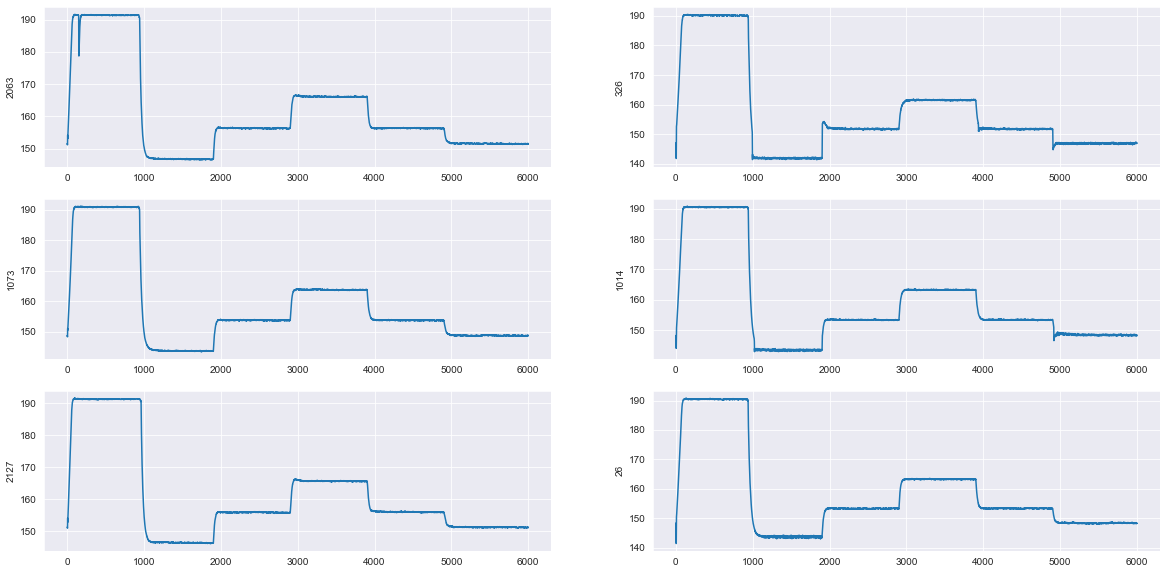

In [18]:
random_plots(pressure_sensor_1)

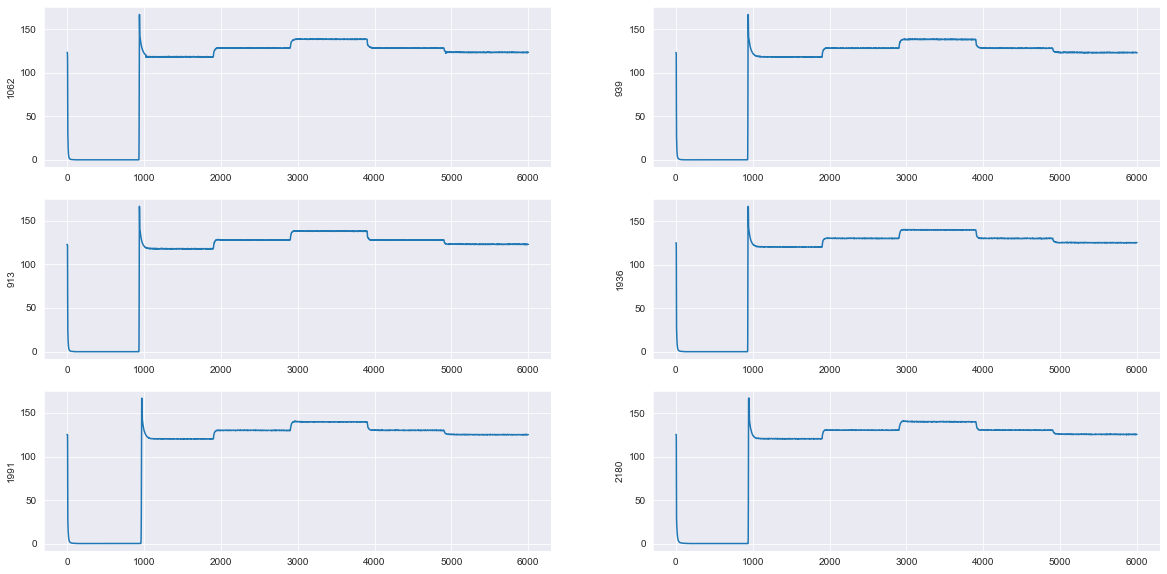

In [19]:
random_plots(pressure_sensor_2)

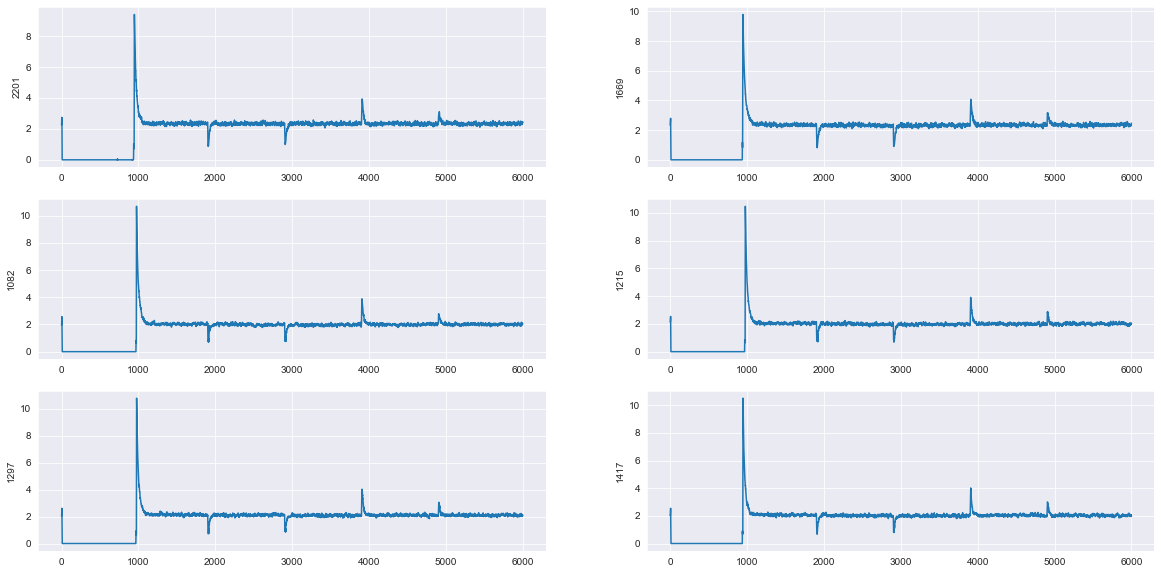

In [20]:
random_plots(pressure_sensor_3)

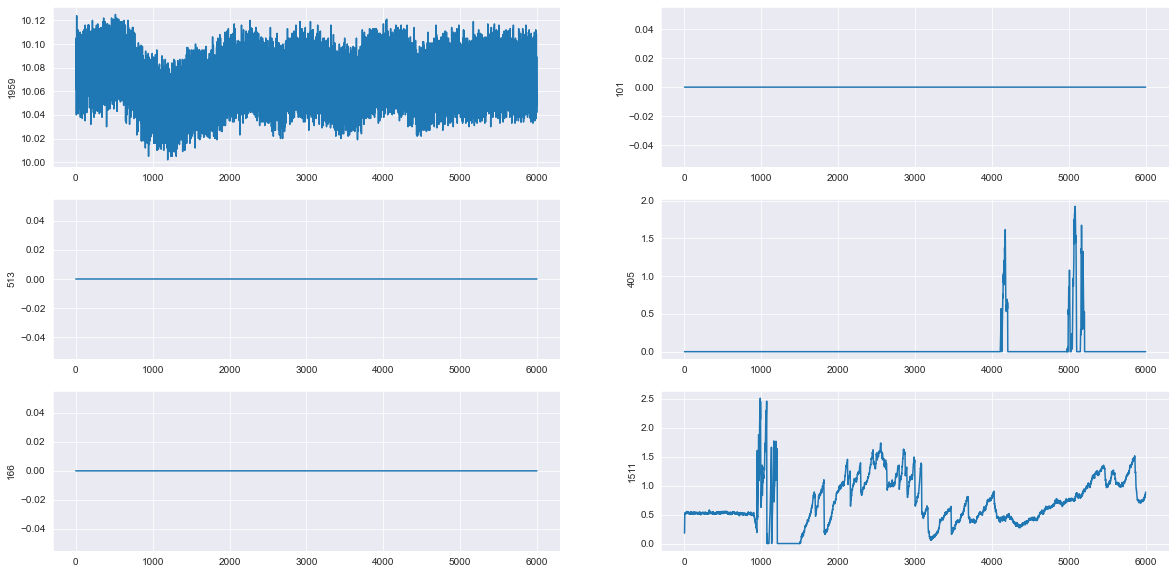

In [21]:
random_plots(pressure_sensor_4)

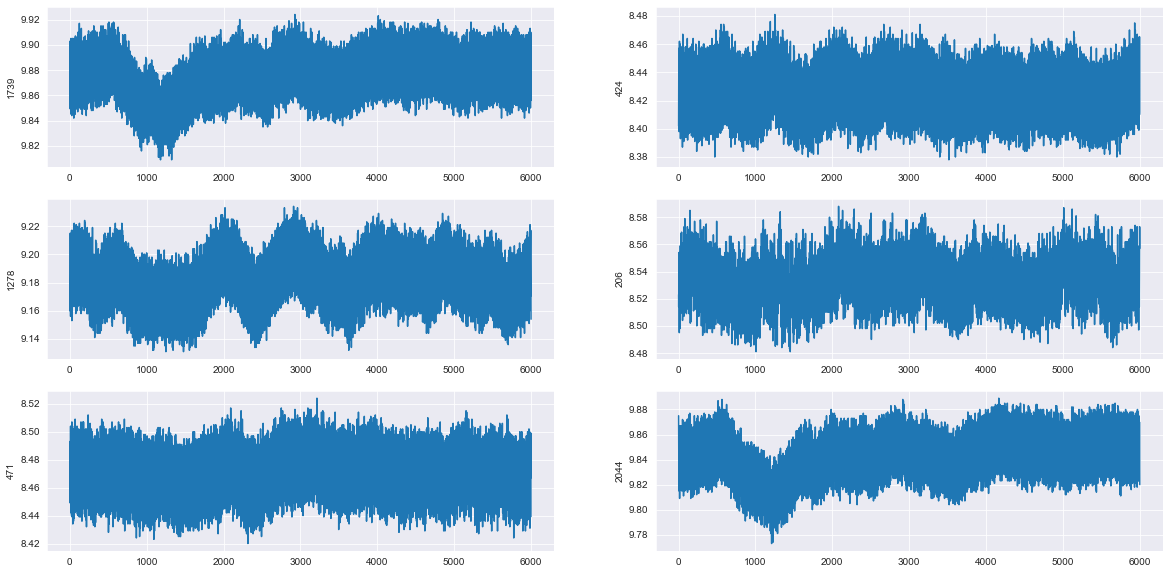

In [22]:
random_plots(pressure_sensor_5)

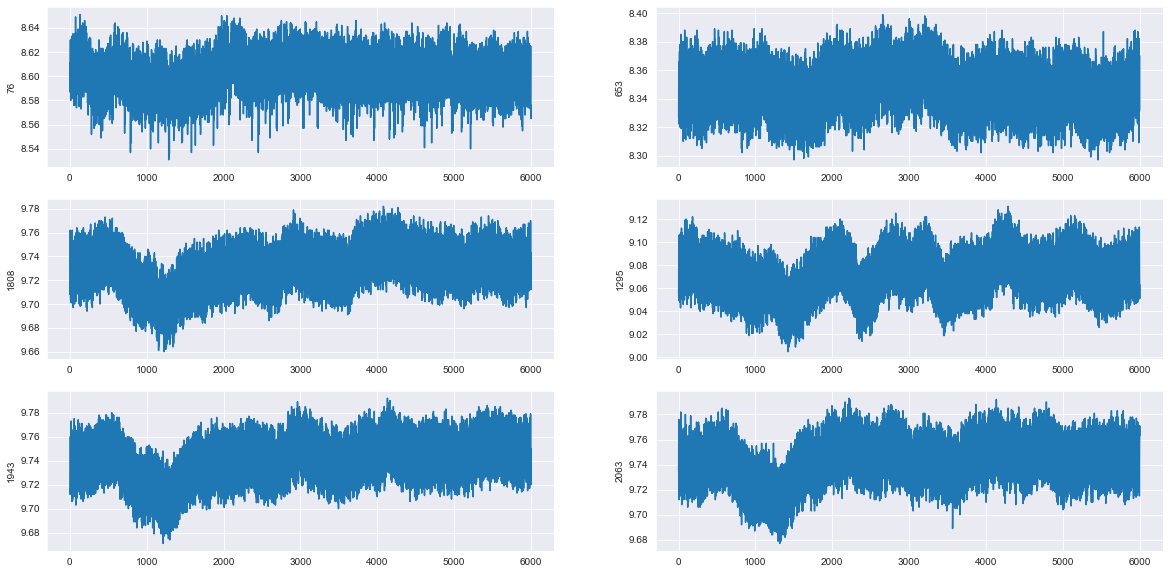

In [23]:
random_plots(pressure_sensor_6)

### Temperature Sensor Plots

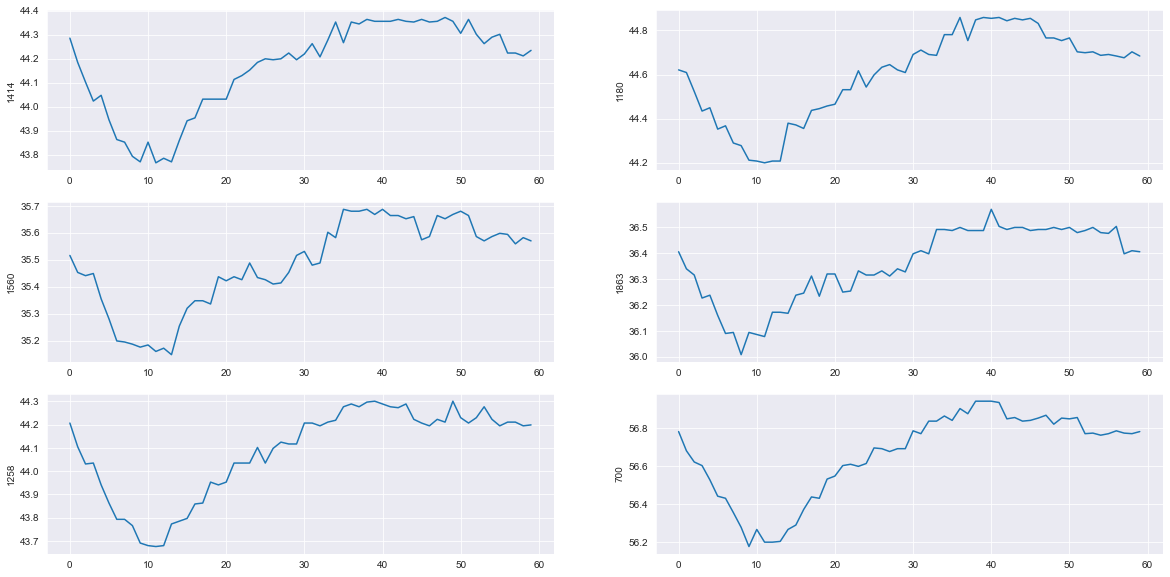

In [24]:
random_plots(temperature_sensor_1)

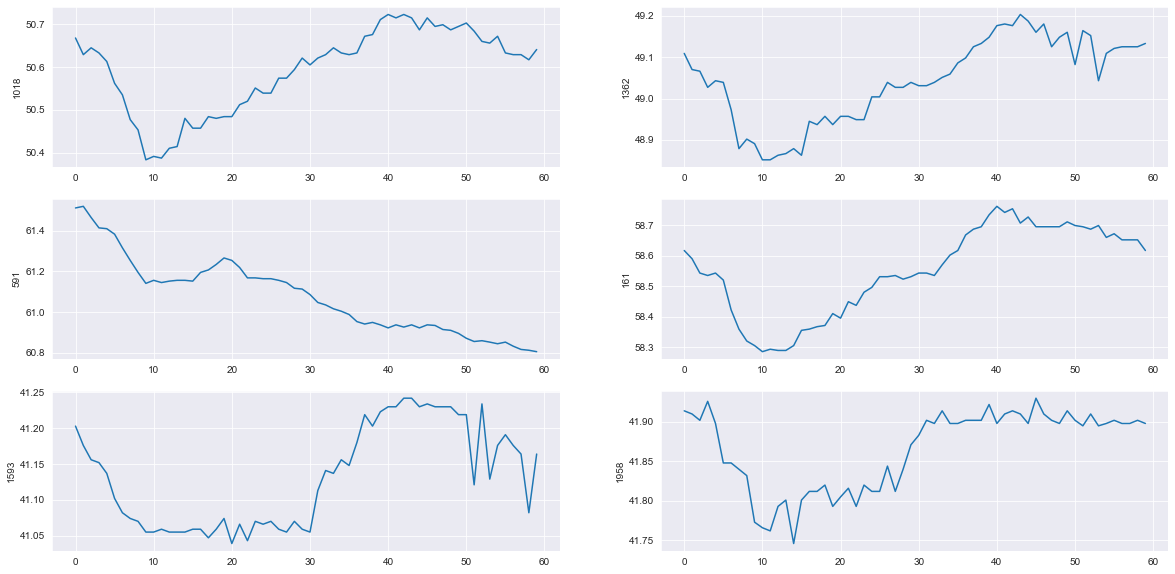

In [25]:
random_plots(temperature_sensor_2)

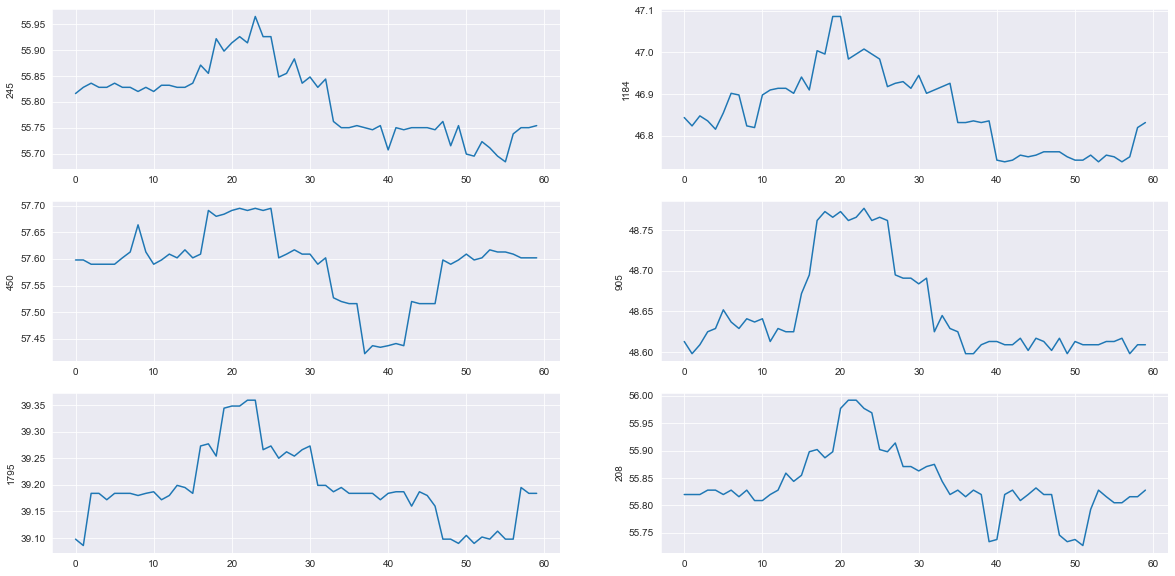

In [26]:
random_plots(temperature_sensor_3)

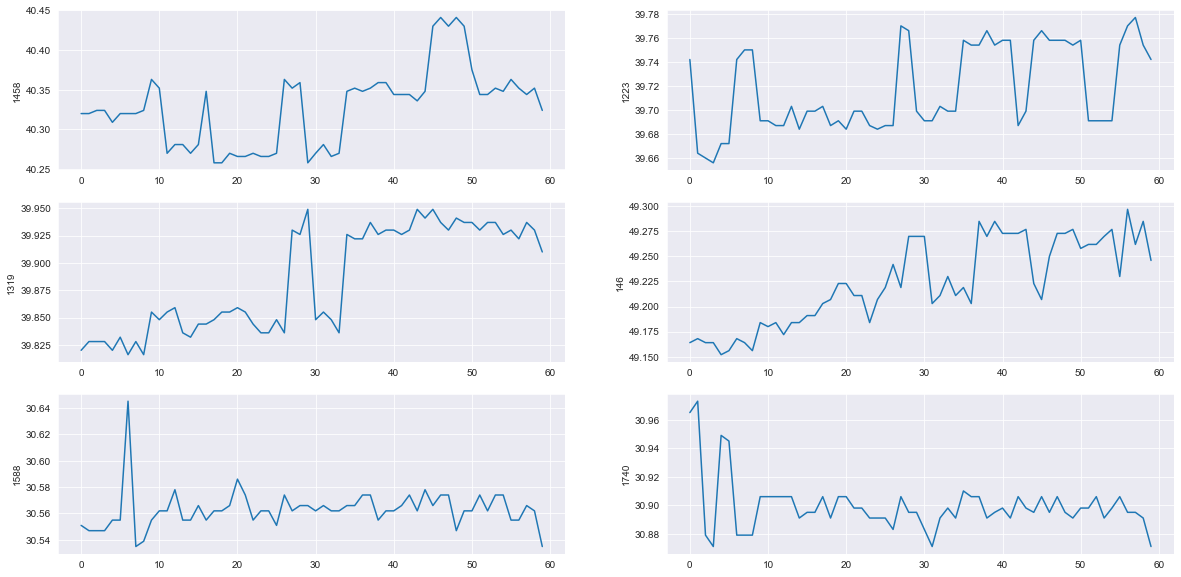

In [27]:
random_plots(temperature_sensor_4)

### Flow Sensor Random Plots

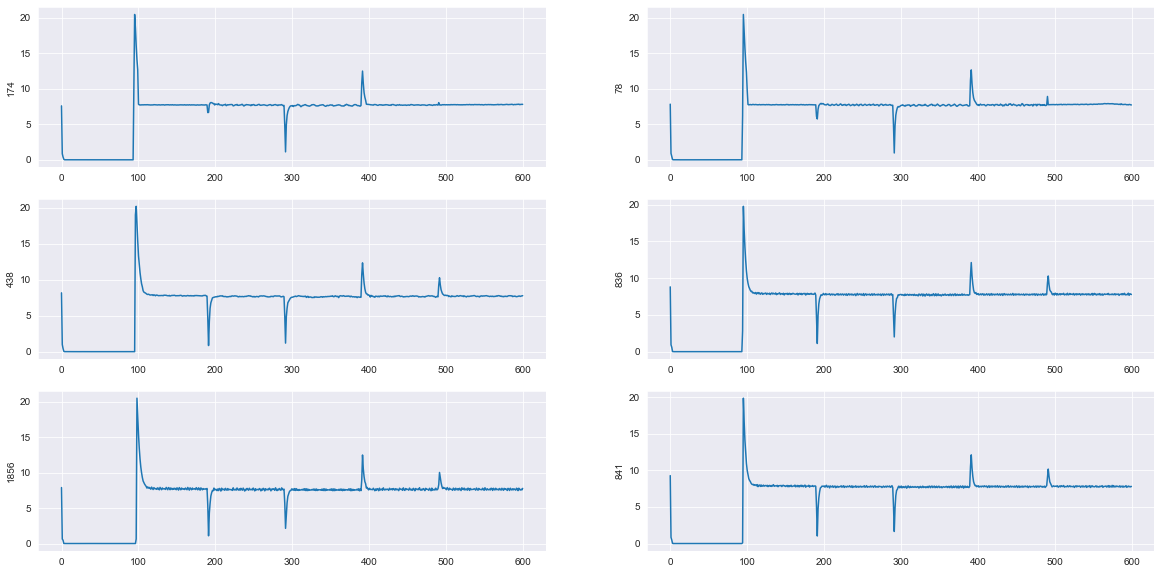

In [28]:
random_plots(flow_sensor_1)

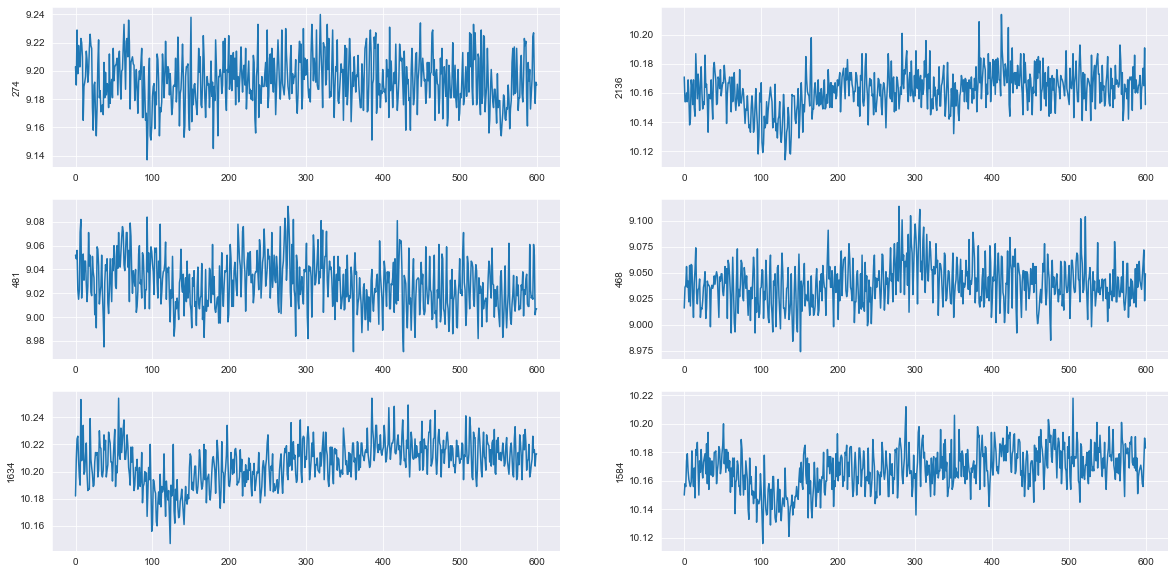

In [29]:
random_plots(flow_sensor_2)

### Motor Power Sensor

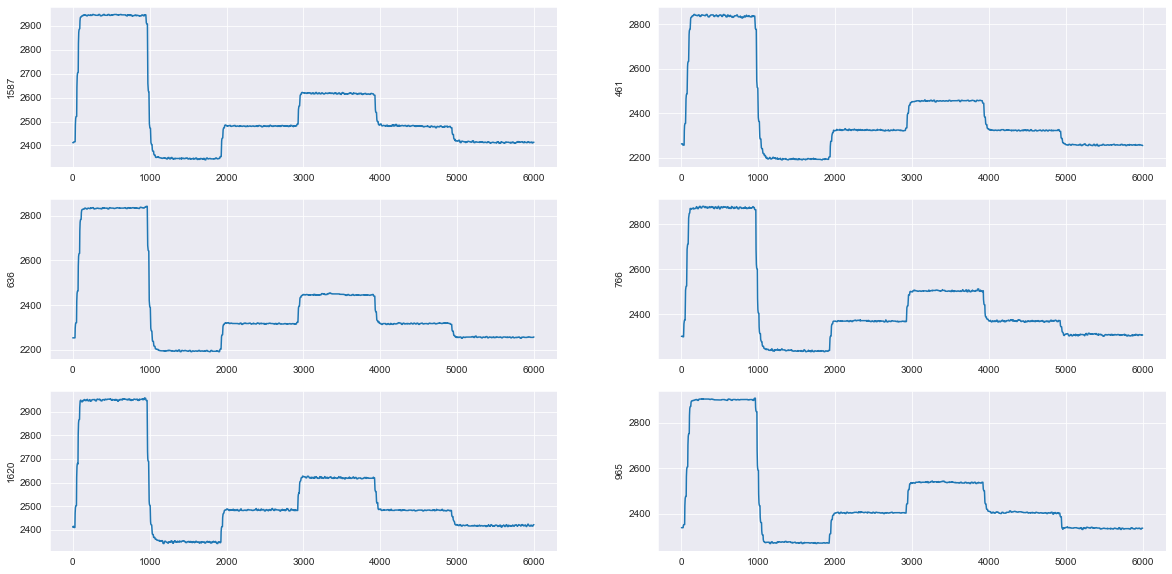

In [30]:
random_plots(motor_power)

### Vibration Sensor

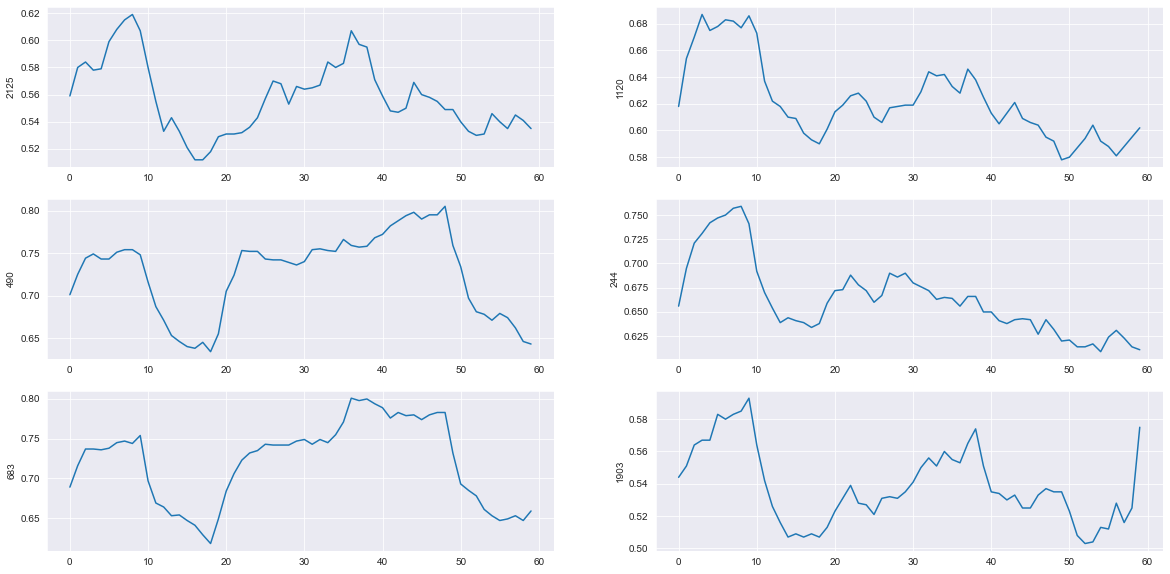

In [31]:
random_plots(vibration_sensor_1)

### Cooling Power Sensor

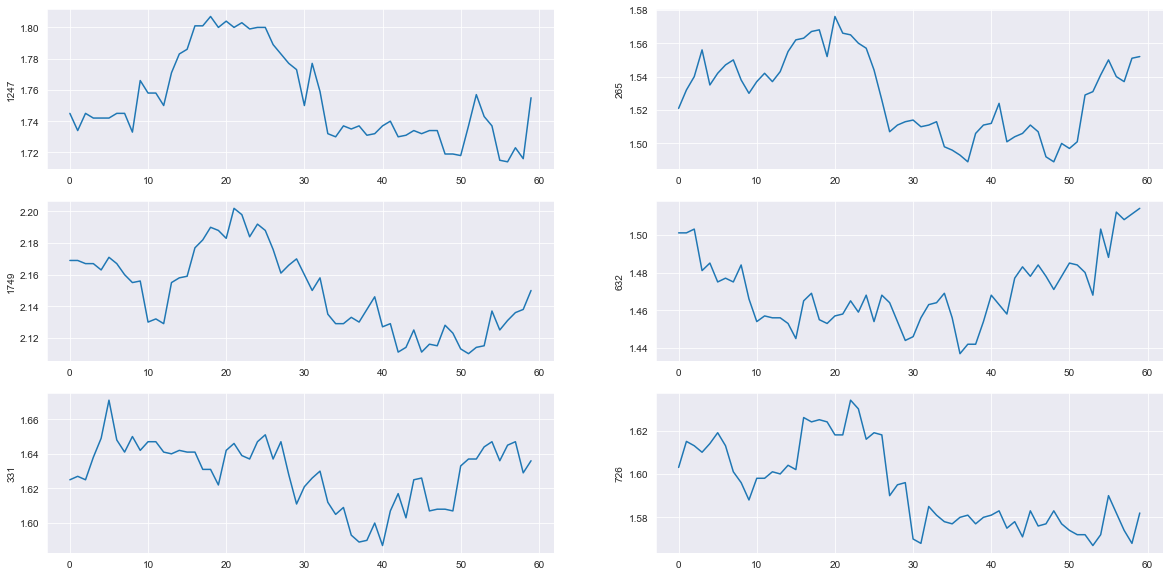

In [32]:
random_plots(cooling_power)

In [33]:
# Function to construct statistical features
def feature_maker(df,sensor):
    '''This function builds statistical features and returns a
    new data frame
    Parameters:
    -----------
    df: DataFrame for which new features need to be built
    sensor: Name of the sensor
    Output:
    -------
    Returns data frame with 8 statistical features for each feature,
    Hence, the with dimensions n*8 '''
    

    df_new=pd.DataFrame()
    df_new[f'{sensor}_mean']=df.mean(axis=1)
    df_new[f'{sensor}_median']=df.median(axis=1)
    df_new[f'{sensor}_min']=df.min(axis=1)
    df_new[f'{sensor}_max']=df.max(axis=1)
    df_new[f'{sensor}_std']=df.std(axis=1)
    df_new[f'{sensor}_kurtosis']=kurtosis(df,axis=1)
    df_new[f'{sensor}_skewness']=skew(df,axis=1)
    df_new[f'{sensor}_iqr']=iqr(df,axis=1)

    return df_new

In [34]:
# Concatinating all the new pressure sensor data after statistical feature engineering:

ps1_new=feature_maker(pressure_sensor_1,'PS1')
ps2_new=feature_maker(pressure_sensor_2,'PS2')
ps3_new=feature_maker(pressure_sensor_3,'PS3')
ps4_new=feature_maker(pressure_sensor_4,'PS4')
ps5_new=feature_maker(pressure_sensor_5,'PS5')
ps6_new=feature_maker(pressure_sensor_6,'PS6')

pressure_sensor_final= pd.concat([ps1_new,ps2_new,ps3_new,ps4_new,ps5_new,ps6_new],axis=1)

In [35]:
pressure_sensor_final

,PS1_mean,PS1_median,PS1_min,PS1_max,PS1_std,PS1_kurtosis,PS1_skewness,PS1_iqr,PS2_mean,PS2_median,...,PS5_skewness,PS5_iqr,PS6_mean,PS6_median,PS6_min,PS6_max,PS6_std,PS6_kurtosis,PS6_skewness,PS6_iqr
0,160.673492,156.25,145.83,191.51,13.939309,0.495566,1.273048,15.1200,109.466914,129.365,...,-0.001178,0.16000,9.728097,9.733,9.568,9.887,0.085366,-1.285051,-0.066643,0.156
1,160.603320,156.06,145.73,191.47,14.118967,0.460174,1.278690,15.1300,109.354890,129.385,...,0.289772,0.05600,9.529488,9.526,9.454,9.637,0.036316,-0.515116,0.236280,0.053
2,160.347720,155.72,145.37,191.41,14.192619,0.464134,1.282851,15.2800,109.158845,129.325,...,0.186889,0.05100,9.427949,9.425,9.348,9.536,0.036031,-0.507092,0.185500,0.052
3,160.188088,155.56,145.14,191.34,14.227803,0.470640,1.286353,15.3100,109.064807,128.865,...,0.162456,0.05525,9.337430,9.335,9.257,9.431,0.037375,-0.668805,0.160194,0.055
4,160.000472,155.34,144.95,191.41,14.276434,0.481844,1.292315,15.3000,108.931434,129.000,...,0.244247,0.04300,9.260636,9.260,9.195,9.342,0.028592,-0.459002,0.205203,0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.227572,156.59,146.69,191.81,13.987129,0.462507,1.291810,14.4300,109.779581,130.300,...,-0.031586,0.03700,9.850361,9.849,9.790,9.905,0.021802,-0.792293,-0.084761,0.035
2201,161.206070,156.55,146.64,191.81,14.001418,0.458705,1.290347,14.4500,109.787481,130.275,...,-0.076814,0.03800,9.844854,9.844,9.777,9.894,0.021932,-0.731354,-0.140939,0.036
2202,161.192120,156.56,146.63,191.84,13.988350,0.461996,1.290762,14.4300,109.756174,130.250,...,-0.096459,0.03700,9.842628,9.842,9.777,9.896,0.022094,-0.739658,-0.127063,0.036
2203,161.208917,156.58,146.65,191.77,13.985248,0.463266,1.292470,14.4225,109.793884,130.300,...,-0.156943,0.03800,9.846690,9.846,9.767,9.900,0.023185,-0.496249,-0.226663,0.036


In [36]:
# Concatinating all the new temperature sensor data after statistical feature engineering:

ts1_new=feature_maker(temperature_sensor_1,'TS1')
ts2_new=feature_maker(temperature_sensor_2,'TS2')
ts3_new=feature_maker(temperature_sensor_3,'TS3')
ts4_new=feature_maker(temperature_sensor_4,'TS4')

temperature_sensor_final= pd.concat([ts1_new,ts2_new,ts3_new,ts4_new],axis=1)

In [37]:
temperature_sensor_final

,TS1_mean,TS1_median,TS1_min,TS1_max,TS1_std,TS1_kurtosis,TS1_skewness,TS1_iqr,TS2_mean,TS2_median,...,TS3_skewness,TS3_iqr,TS4_mean,TS4_median,TS4_min,TS4_max,TS4_std,TS4_kurtosis,TS4_skewness,TS4_iqr
0,35.621983,35.5720,35.156,36.152,0.308230,-1.334003,0.037038,0.49875,40.978767,40.9630,...,-0.708675,0.10475,31.745250,31.576,30.363,33.594,1.116478,-1.391114,0.247706,2.11350
1,36.676967,36.7675,35.648,37.488,0.585740,-1.349416,-0.291293,1.09750,41.532767,41.5180,...,-0.067928,0.26250,34.493867,34.553,33.648,35.148,0.435312,-1.065971,-0.305291,0.74250
2,37.880800,38.0235,36.879,38.621,0.559169,-1.236851,-0.452482,1.00075,42.442450,42.4235,...,0.029609,0.38400,35.646150,35.635,35.098,36.141,0.293889,-1.058555,-0.094572,0.47975
3,38.879050,39.0550,37.887,39.473,0.516176,-1.115968,-0.543554,0.91575,43.403983,43.3650,...,0.441827,0.45200,36.579467,36.635,36.105,36.988,0.262397,-1.170370,-0.190252,0.42300
4,39.803917,39.9670,38.789,40.391,0.535374,-1.194279,-0.512869,0.95750,44.332750,44.3355,...,-0.083235,0.50800,37.427900,37.439,36.992,37.781,0.239571,-1.163502,-0.181394,0.36775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,35.313783,35.4100,35.000,35.516,0.141893,-0.749753,-0.727560,0.23075,40.874800,40.8790,...,-0.042205,0.10775,30.404733,30.395,30.363,30.488,0.032142,1.468682,1.550840,0.02300
2201,35.321600,35.3765,34.988,35.516,0.137743,-0.498639,-0.776957,0.19575,40.868883,40.8710,...,0.201577,0.14100,30.416233,30.395,30.367,30.488,0.037951,-1.039618,0.752390,0.06600
2202,35.319183,35.4060,34.984,35.520,0.152040,-0.869560,-0.639716,0.25075,40.875950,40.8790,...,0.348892,0.17200,30.426250,30.406,30.367,30.496,0.045413,-1.491979,0.401106,0.08900
2203,35.324767,35.4120,35.000,35.531,0.158769,-0.812144,-0.660902,0.25700,40.876067,40.8930,...,0.258912,0.15700,30.414283,30.402,30.363,30.488,0.038725,-0.375417,1.051564,0.02400


In [38]:
# Concatinating all the new flow sensor data after statistical feature engineering:

fs1_new=feature_maker(flow_sensor_1,'FS1')
fs2_new=feature_maker(flow_sensor_2,'FS2')

flow_sensor_final= pd.concat([fs1_new,fs2_new],axis=1)

In [39]:
flow_sensor_final

,FS1_mean,FS1_median,FS1_min,FS1_max,FS1_std,FS1_kurtosis,FS1_skewness,FS1_iqr,FS2_mean,FS2_median,FS2_min,FS2_max,FS2_std,FS2_kurtosis,FS2_skewness,FS2_iqr
0,6.709815,7.8360,0.0,18.710,3.015428,1.661736,-1.399797,0.24625,10.304592,10.327,10.148,10.446,0.091772,-1.391252,-0.316691,0.17850
1,6.715315,7.8530,0.0,18.712,3.006248,1.637921,-1.446472,0.22825,10.403098,10.403,10.352,10.453,0.019162,-0.373765,-0.000509,0.02700
2,6.718522,7.8470,0.0,18.698,3.014248,1.624573,-1.431863,0.25550,10.366250,10.367,10.296,10.443,0.026361,-0.426370,0.073871,0.03825
3,6.720565,7.8430,0.0,18.896,3.020176,1.655717,-1.406670,0.24325,10.302678,10.302,10.241,10.382,0.026750,-0.331741,0.269416,0.03725
4,6.690308,7.8310,0.0,18.876,3.011550,1.619443,-1.422662,0.25300,10.237750,10.236,10.179,10.312,0.029170,-0.750231,0.275750,0.04400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,6.689930,7.8395,0.0,20.228,3.001512,1.914197,-1.387100,0.23700,10.184515,10.185,10.147,10.224,0.013701,-0.153943,-0.060554,0.01800
2201,6.692182,7.8340,0.0,20.308,3.005831,1.931628,-1.380469,0.22125,10.177767,10.178,10.133,10.233,0.014669,0.474818,-0.039883,0.01800
2202,6.693277,7.8330,0.0,20.071,2.991333,1.925117,-1.410821,0.22550,10.176172,10.177,10.127,10.225,0.014749,0.221041,-0.187083,0.01925
2203,6.684128,7.8235,0.0,20.280,3.003983,1.926283,-1.382422,0.21675,10.178353,10.180,10.129,10.230,0.014619,0.696647,-0.373477,0.02000


In [40]:
# Creating new dataframe for motor power
motor_power_final=feature_maker(motor_power,'EPS1')

motor_power_final

,EPS1_mean,EPS1_median,EPS1_min,EPS1_max,EPS1_std,EPS1_kurtosis,EPS1_skewness,EPS1_iqr
0,2538.929167,2479.8,2339.8,2951.6,185.616121,0.425555,1.239186,209.0
1,2531.498900,2470.0,2332.0,2947.4,189.940089,0.423567,1.266706,210.0
2,2519.928000,2457.4,2318.6,2939.8,190.736850,0.425694,1.270605,211.8
3,2511.541633,2448.0,2310.8,2929.6,191.270607,0.441855,1.277350,210.0
4,2503.449500,2440.6,2301.8,2923.8,191.258369,0.454105,1.280943,208.8
...,...,...,...,...,...,...,...,...
2200,2543.911033,2481.6,2346.0,2953.2,187.530212,0.414707,1.271217,200.0
2201,2543.411333,2481.6,2345.8,2950.8,187.062031,0.379837,1.251801,201.6
2202,2542.729767,2480.6,2345.8,2949.4,186.846232,0.386901,1.254341,201.0
2203,2544.046333,2481.8,2346.0,2951.6,186.799816,0.389419,1.256689,200.2


In [41]:
# Creating new dataframe for vibration_sensor_1
vibration_sensor_1_final=feature_maker(vibration_sensor_1,'VS1')

vibration_sensor_1_final

,VS1_mean,VS1_median,VS1_min,VS1_max,VS1_std,VS1_kurtosis,VS1_skewness,VS1_iqr
0,0.576950,0.5770,0.532,0.624,0.027078,-1.275101,-0.044978,0.05000
1,0.565850,0.5595,0.524,0.626,0.027241,-0.238839,0.770789,0.03150
2,0.576533,0.5620,0.529,0.662,0.036729,-0.042351,0.934103,0.04600
3,0.569267,0.5550,0.527,0.645,0.033464,-0.165555,1.007775,0.04425
4,0.577367,0.5760,0.524,0.660,0.033484,0.027945,0.795914,0.04425
...,...,...,...,...,...,...,...,...
2200,0.550833,0.5485,0.512,0.618,0.029820,0.072164,0.941500,0.03425
2201,0.547483,0.5425,0.507,0.584,0.021463,-1.037576,0.146576,0.03400
2202,0.545233,0.5440,0.502,0.597,0.024047,-0.902634,-0.000037,0.03650
2203,0.537017,0.5350,0.502,0.585,0.017652,-0.312883,0.116765,0.02625


In [42]:
# Creating new dataframe for cooling_efficiency
cooling_efficiency_final=feature_maker(cooling_efficiency,'CE')

cooling_efficiency_final

,CE_mean,CE_median,CE_min,CE_max,CE_std,CE_kurtosis,CE_skewness,CE_iqr
0,39.601350,40.6755,28.866,47.438,6.370535,-1.419685,-0.267015,12.32750
1,25.786433,25.3855,23.320,29.208,1.686129,-1.097494,0.401015,2.84125
2,22.218233,22.1040,21.220,23.554,0.638345,-1.103712,0.304239,1.10850
3,20.459817,20.4805,19.673,21.565,0.455755,-0.251527,0.183835,0.57200
4,19.787017,19.7985,19.133,20.460,0.290156,-0.073937,-0.025580,0.33425
...,...,...,...,...,...,...,...,...
2200,46.628517,46.6335,46.242,47.092,0.237772,-1.206906,0.106134,0.43625
2201,46.689817,46.6510,45.762,47.486,0.392929,-0.641794,-0.291471,0.57350
2202,46.472300,46.7005,45.683,47.206,0.462510,-1.363688,-0.403148,0.80975
2203,46.544967,46.5490,45.846,47.001,0.242202,0.552502,-0.398242,0.30625


In [43]:
# Creating new dataframe for cooling_power
cooling_power_final=feature_maker(cooling_power,'CP')

cooling_power_final

,CP_mean,CP_median,CP_min,CP_max,CP_std,CP_kurtosis,CP_skewness,CP_iqr
0,1.862750,1.9240,1.383,2.188,0.279385,-1.406497,-0.345513,0.52700
1,1.255550,1.2340,1.147,1.414,0.074605,-1.149507,0.402252,0.12150
2,1.113217,1.1095,1.076,1.159,0.023263,-0.877893,0.245656,0.03275
3,1.062150,1.0660,1.022,1.107,0.024621,-1.036550,-0.027257,0.03150
4,1.070467,1.0725,1.016,1.106,0.021477,-0.357209,-0.482068,0.03050
...,...,...,...,...,...,...,...,...
2200,2.160600,2.1615,2.127,2.196,0.018171,-0.917702,-0.143915,0.02750
2201,2.151450,2.1485,2.094,2.200,0.023372,-0.478246,-0.047794,0.03625
2202,2.143300,2.1425,2.099,2.188,0.027183,-1.108487,0.045058,0.04525
2203,2.148483,2.1480,2.107,2.188,0.017777,-0.280889,-0.041004,0.02625


In [44]:
# Creating new dataframe for cooling_power
efficiency_factor_final=feature_maker(efficiency_factor,'SE')

efficiency_factor_final

,SE_mean,SE_median,SE_min,SE_max,SE_std,SE_kurtosis,SE_skewness,SE_iqr
0,59.157183,68.5145,0.0,79.568,23.763984,2.339639,-2.030801,1.232
1,59.335617,68.5360,0.0,80.441,23.857918,2.322487,-2.022689,1.496
2,59.543150,68.8530,0.0,80.824,23.923381,2.338352,-2.027789,1.556
3,59.794900,69.0060,0.0,80.930,24.023005,2.338694,-2.028969,1.283
4,59.455267,69.0130,0.0,81.100,23.972262,2.268655,-2.000267,1.477
...,...,...,...,...,...,...,...,...
2200,59.033100,68.4505,0.0,77.752,23.635352,2.405264,-2.055932,1.399
2201,59.068000,68.4075,0.0,77.592,23.638396,2.414648,-2.059495,1.223
2202,59.132350,68.3130,0.0,77.773,23.633405,2.441802,-2.069487,1.298
2203,58.970800,68.3500,0.0,77.568,23.600817,2.413508,-2.059104,1.220


In [45]:
# Final DataFrame by concatinating the data from all the sensors
df=pd.concat([pressure_sensor_final,temperature_sensor_final,flow_sensor_final,vibration_sensor_1_final,motor_power_final,
             cooling_efficiency_final,cooling_power_final,efficiency_factor_final],axis=1)

In [46]:
df.shape

(2205, 136)

In [47]:
df.to_csv('../data/processed_data/final_df.csv',index=False)

In [48]:
df_target.to_csv('../data/processed_data/target_df.csv',index=False)